# はじめに
ここでは、菅さんからのタスクで「レモン、いちご、みかんの画像分類」を行います！

かなり難しいですが、一緒に頑張って考えましょう！

参考サイトはこちら→https://webbibouroku.com/Blog/Article/sklearn-cluster-flag

まず、必要なライブラリをインストールします。以下の3つのコードを実行してください。

In [1]:
!pip install opencv-python

You should consider upgrading via the '/Users/tomoyayanagi/rejoui/rejoui/bin/python3 -m pip install --upgrade pip' command.


In [2]:
!pip install scikit-learn

You should consider upgrading via the '/Users/tomoyayanagi/rejoui/rejoui/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install scikit-image

You should consider upgrading via the '/Users/tomoyayanagi/rejoui/rejoui/bin/python3 -m pip install --upgrade pip' command.


# 必要なライブラリのインポート
次に、必要なライブラリのインポートを行います。

In [1]:
import cv2

In [2]:
import os
import shutil
import numpy as np
from PIL import Image
from skimage import data
from sklearn.cluster import KMeans

install、import関連は以上です（2回目以降はimportだけ実行すればいいです）  
また、picture_origin、picture_convert、picture_groupというファイルを、このipynbファイルと同じディレクトリに作っておきます

# 画像のサイズをそろえる
次に、今のままでは画像ごとに大きさが違うので、画像のサイズをそろえて保存します。  
今回はpicture_originに、**レモン・みかん・いちご**の写真を入れておきました！


まずは、画像のサイズがバラバラなので、サイズを200*200に設定して新たに保存します。

また、コンピュータで画像を読み込む時、画像は「**ピクセル**」という小さな四角が組み合わさってできたものと考えます。また、それぞれのピクセルには**赤、緑、青**という3色を混ぜて表現されることが多いです。
今回は、ピクセルごとの色の順番を「赤（R）、緑（G）、青（B）」に設定し、画像を200*200に揃えた後、保存します。

In [3]:
#picture_origin内にある写真データのファイル名をfor文でそれぞれ呼び出す。
for path in os.listdir('./picture_origin'):
    #写真を開く
    img = Image.open(f'./picture_origin/{path}')
    #RGBに変換
    img = img.convert('RGB')
    #画像のサイズを200*200にする
    img_resize = img.resize((200, 200))
    #再度新しいフォルダに保存
    img_resize.save(f'./picture_convert/{path}')

# 画像を数値の列として保存する
画像のサイズをそろえたので、次は画像をモデルに入れられるような形に変換します。  
まず、画像を読み込み、それらを数値の列にします。この時、画像は200 * 200で、1ピクセルにRGBの3色があるので、1枚の画像を表すのに必要な数字の種類は200 * 200 * 3=120000になります！

In [4]:
#画像を数値で読み込む
feature = np.array([cv2.imread(f'./picture_convert/{path}') for path in os.listdir('./picture_convert')])

In [5]:
#画像の形を変える
feature = feature.reshape(len(feature), -1).astype(np.float64)

ここで、featureの形を見てみましょう。画像の数は53枚なので、53(枚) * 120000(1枚の画像を表すのに必要な数値の数)になります。

In [6]:
feature.shape

(53, 120000)

# 分類モデル作成
いよいよ分類モデルの作成です。モデルには、**Kmeans法**というデータをグループ分けする手法を使います。

以下では、KMeans法をやってみます。

n_clusters=3の '3' の部分は自分で変えて、いくつのグループに分けるかを変えてみても面白いかもしれません！

In [7]:
#Kmeans法を実行
model = KMeans(n_clusters=3, random_state=2021).fit(feature)

学習が完了したら各データがどのグループになったかわかる結果ラベルを受け取ります。  
同じラベルの画像は類似度が高い（似ている）という判定です。

In [8]:
#分類結果を取得
labels = model.labels_

In [9]:
labels

array([2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 1,
       0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 2,
       1, 0, 2, 0, 1, 1, 1, 1, 2], dtype=int32)

最後に得られたラベルをもとに、似ている画像をフォルダにコピーしてまとめます。  
picture_groupにクラスタリングされた画像が入っているはずです。

In [10]:
for label, path in zip(labels, os.listdir('./picture_convert')):
    #グループごとのフォルダを作る
    os.makedirs(f"./picture_group/{label}", exist_ok=True)
    #グループごとに画像を分けて、新しいファイルにコピーする
    shutil.copyfile(f"./picture_origin/{path}", f"./picture_group/{label}/{path}")
    print(label, path)

2 strawberry_040.jpg
2 Lemon_012.jpg
0 Lemon_006.jpg
1 mikan_021.jpg
1 mikan_009.jpg
1 mikan_008.jpg
1 mikan_020.jpg
0 Lemon_007.jpg
2 Lemon_013.jpg
0 strawberry_025.jpg
1 strawberry_019.jpg
0 Lemon_005.jpg
1 mikan_023.jpg
2 strawberry_018.jpg
2 Lemon_004.jpg
2 strawberry_030.jpg
2 strawberry_024.jpg
0 Lemon_014.jpg
1 mikan_027.jpg
1 Lemon_015.jpg
0 Lemon_001.jpg
1 Lemon_017.jpg
0 Lemon_003.jpg
1 strawberry_023.jpg
0 mikan_018.jpg
2 mikan_024.jpg
2 mikan_025.jpg
1 mikan_019.jpg
1 strawberry_022.jpg
2 Lemon_016.jpg
1 mikan_014.jpg
2 mikan_028.jpg
1 mikan_015.jpg
2 strawberry_006.jpg
1 Lemon_018.jpg
2 strawberry_010.jpg
1 mikan_003.jpg
0 mikan_002.jpg
0 Lemon_019.jpg
1 Lemon_021.jpg
1 strawberry_029.jpg
2 strawberry_015.jpg
0 Lemon_009.jpg
2 mikan_012.jpg
1 mikan_006.jpg
0 mikan_007.jpg
2 strawberry_014.jpg
0 Lemon_008.jpg
1 strawberry_028.jpg
1 Lemon_020.jpg
1 Lemon_022.jpg
1 mikan_010.jpg
2 mikan_004.jpg


最後に、グループ分けした画像をグループごとに表示します。
どんな画像が同じグループになったのか、確認してみましょう！

In [11]:
import matplotlib.pyplot as plt

==========class 0 ==========


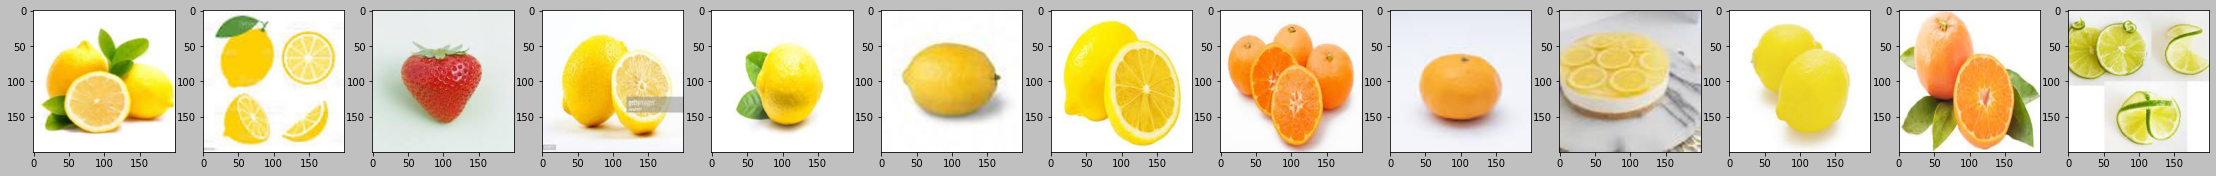

==========class 1 ==========


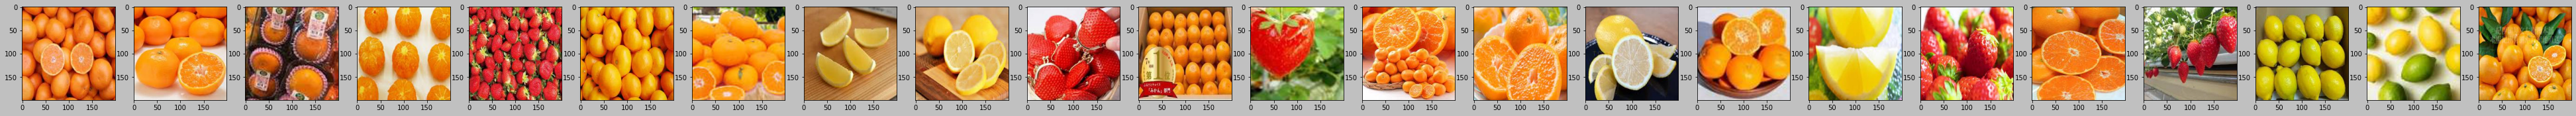

==========class 2 ==========


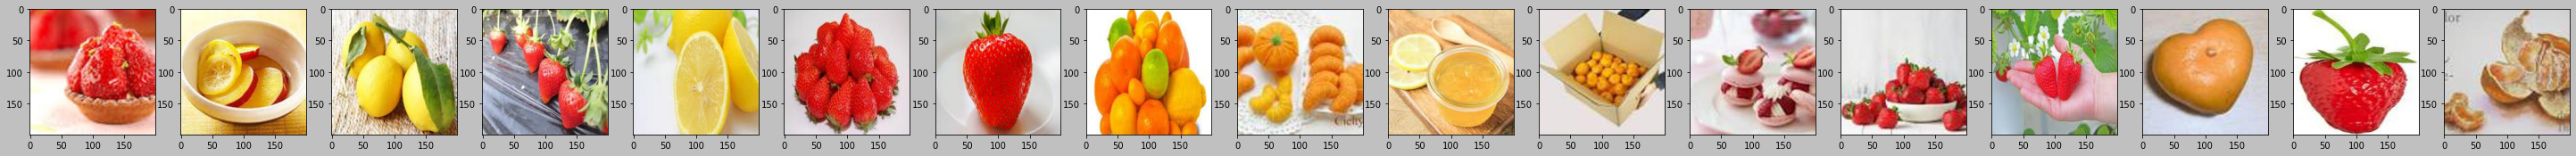

In [14]:
for i in range(3): #この数字はn_clustersと合わせましょう
    print('==========class', i, '==========')
    #各グループごとの画像を得る
    feature = np.array([cv2.imread(f'./picture_convert/{path}') for path in os.listdir(f'./picture_group/{i}')])
    #featureの形は(画像数, 200, 200, 3)
    num_images = feature.shape[0] #画像数を出す
    fig, ax = plt.subplots(1, num_images, facecolor='silver', figsize=(3*num_images, 5)) #subplot（画像数に合わせたパレットを作る）
    for j in range(num_images): #画像分
        ax[j].imshow(cv2.cvtColor(feature[j], cv2.COLOR_BGR2RGB))
    plt.show()